In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('trash_1_1_1_clean.csv', skiprows=8)
# data = data.iloc[4:]

In [436]:
data

,Time,Displacement,Force
0,(s),(mm),(kN)
1,0.0000,0.0081,0.0000
2,0.0200,0.0081,0.0000
3,0.0400,0.0086,0.0000
4,0.0600,0.0103,0.0002
...,...,...,...
126,2.5000,0.4166,0.0684
127,2.5200,0.4199,0.0690
128,2.5400,0.4233,0.0694
129,2.5600,0.4266,0.0393


In [437]:
values=data[1:].astype(float)

In [358]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 1 to 130
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          130 non-null    float64
 1   Displacement  130 non-null    float64
 2   Force         130 non-null    float64
dtypes: float64(3)
memory usage: 3.2 KB


In [438]:
columns = data.columns[:3].tolist()

In [412]:
len(columns)

3

In [439]:
units = data.iloc[0].tolist()

In [414]:
len(units)

3

In [440]:
new_columns = [i + j for i, j in zip(columns, units)]

In [441]:
new_columns

['Time(s)', 'Displacement(mm)', 'Force(kN)']

In [443]:
data.columns = new_columns

In [444]:
data

,Time(s),Displacement(mm),Force(kN)
0,(s),(mm),(kN)
1,0.0000,0.0081,0.0000
2,0.0200,0.0081,0.0000
3,0.0400,0.0086,0.0000
4,0.0600,0.0103,0.0002
...,...,...,...
126,2.5000,0.4166,0.0684
127,2.5200,0.4199,0.0690
128,2.5400,0.4233,0.0694
129,2.5600,0.4266,0.0393


In [446]:
data=data.drop(data.index[0])

In [447]:
data

,Time(s),Displacement(mm),Force(kN)
1,0.0000,0.0081,0.0000
2,0.0200,0.0081,0.0000
3,0.0400,0.0086,0.0000
4,0.0600,0.0103,0.0002
5,0.0800,0.0132,0.0006
...,...,...,...
126,2.5000,0.4166,0.0684
127,2.5200,0.4199,0.0690
128,2.5400,0.4233,0.0694
129,2.5600,0.4266,0.0393


In [448]:
data.reset_index(drop=True, inplace=True)

In [449]:
data

,Time(s),Displacement(mm),Force(kN)
0,0.0000,0.0081,0.0000
1,0.0200,0.0081,0.0000
2,0.0400,0.0086,0.0000
3,0.0600,0.0103,0.0002
4,0.0800,0.0132,0.0006
...,...,...,...
125,2.5000,0.4166,0.0684
126,2.5200,0.4199,0.0690
127,2.5400,0.4233,0.0694
128,2.5600,0.4266,0.0393


In [450]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Time(s)           130 non-null    object
 1   Displacement(mm)  130 non-null    object
 2   Force(kN)         130 non-null    object
dtypes: object(3)
memory usage: 3.2+ KB


In [451]:
data=data.astype(float)

In [ ]:
# convert displacemnt from mm to m 

In [456]:
data['Displacement(mm)']=data['Displacement(mm)']/1000

In [459]:
data = data.rename(columns={'Displacement(mm)':'Displacement(m)'})


In [460]:
data.columns


Index(['Time(s)', 'Displacement(m)', 'Force(kN)'], dtype='object')

In [431]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time(s)           130 non-null    float64
 1   Displacement(mm)  130 non-null    float64
 2   Force(kN)         130 non-null    float64
dtypes: float64(3)
memory usage: 3.2 KB


PQ = load as determined in 9.1.1, kN,
B = specimen thickness as determined in 8.2.1, cm,
W = specimen width as determined in A2.4.1, cm,
a = crack length as determined in 8.2.2, cm, and
x = a/W.

Calculations of KQ—For the compact-tension specimen calculate KQ in units of MPa·m1⁄2 from the following
expression (see Note A2.1).
KQ 5 ~P Q/BW1/2! f~x! (A2.1)

In [461]:
data_select = data.copy()

In [6]:
data_select.drop(['Unnamed: 0','Kq Value', 'Gi'], axis =1, inplace=True)

In [465]:
data_select.drop(['Time(s)'], axis =1, inplace=True)

In [466]:
data_select

,Displacement(m),Force(kN)
0,0.000008,0.0000
1,0.000008,0.0000
2,0.000009,0.0000
3,0.000010,0.0002
4,0.000013,0.0006
...,...,...
125,0.000417,0.0684
126,0.000420,0.0690
127,0.000423,0.0694
128,0.000427,0.0393


In [7]:
data_select.drop([4], inplace= True)


In [8]:
data_select

,Force at Break (Standard),Displacement at Break (Standard)
5,0.0081,0.0000
6,0.0081,0.0000
7,0.0086,0.0000
8,0.0103,0.0002
9,0.0132,0.0006
...,...,...
130,0.4166,0.0684
131,0.4199,0.0690
132,0.4233,0.0694
133,0.4266,0.0393


In [9]:
data_select.reset_index(drop=True, inplace=True)

In [10]:
data_select

,Force at Break (Standard),Displacement at Break (Standard)
0,0.0081,0.0000
1,0.0081,0.0000
2,0.0086,0.0000
3,0.0103,0.0002
4,0.0132,0.0006
...,...,...
125,0.4166,0.0684
126,0.4199,0.0690
127,0.4233,0.0694
128,0.4266,0.0393


In [462]:
data_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time(s)          130 non-null    float64
 1   Displacement(m)  130 non-null    float64
 2   Force(kN)        130 non-null    float64
dtypes: float64(3)
memory usage: 3.2 KB


In [463]:
data_select.columns


Index(['Time(s)', 'Displacement(m)', 'Force(kN)'], dtype='object')

In [13]:
data_select= data_select.astype(float)

In [464]:
data_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time(s)          130 non-null    float64
 1   Displacement(m)  130 non-null    float64
 2   Force(kN)        130 non-null    float64
dtypes: float64(3)
memory usage: 3.2 KB


In [259]:
data_select['Displacement at Break (Standard)']=data_select['Displacement at Break (Standard)']*1000

In [260]:
data_select['Displacement at Break (Standard)']

0       0.0
1       0.0
2       0.0
3       0.2
4       0.6
       ... 
125    68.4
126    69.0
127    69.4
128    39.3
129    12.7
Name: Displacement at Break (Standard), Length: 130, dtype: float64

In [468]:
from scipy.stats import linregress

# Define the y values of the two data points you want to use
y1 = 0.02  # Replace with the y value of your first data point
y2 = 0.06  # Replace with the y value of your second data point

# Find the indices of the data points with the closest y values

# First calculate all the y-y1, to find where the value will get close to 0
# Some of the substractions will be negative (values below y1), therefore we need to add the abs()
# Then we use the function argmin() from numpy
# The numpy.argmin() method returns indices of the min element of the array in a particular axis. 
# Syntax : 
# numpy.argmin(array, axis = None, out = None)
# Parameters : 
# array : Input array to work on 
# axis  : [int, optional]Along a specified axis like 0 or 1
# out   : [array optional]Provides a feature to insert output to the out
#           array and it should be of appropriate shape and dtype


index1 = (data_select['Displacement at Break (Standard)'] - y1).abs().argmin()
index2 = (data_select['Displacement at Break (Standard)'] - y2).abs().argmin()

# Create a subset of the data containing only those two points
subset_force        = data_select['Force at Break (Standard)'][[index1, index2]]
subset_displacement = data_select['Displacement at Break (Standard)'][[index1, index2]]

# Calculate the regression on the subset of data
slope, intercept, r_value, p_value, std_err = linregress(subset_force, subset_displacement)

KeyError: 'Displacement at Break (Standard)'

In [16]:
subset_force        = data_select['Force at Break (Standard)'][[index1, index2]]
subset_force

46     0.1533
111    0.3699
Name: Force at Break (Standard), dtype: float64

In [163]:
#create a function that takes slope and intercept as input

In [17]:
def tangent(x,slope,intercept):
    return x*slope + intercept

data_select['Tangent']=data_select['Force at Break (Standard)'].apply(lambda x: tangent(x,slope,intercept))

In [18]:
data_select['Tangent']

0     -0.006480
1     -0.006480
2     -0.006388
3     -0.006076
4     -0.005543
         ...   
125    0.068581
126    0.069187
127    0.069812
128    0.070419
129    0.070896
Name: Tangent, Length: 130, dtype: float64

In [19]:
def deviation(x,slope,intercept):
    return x*0.95*slope + intercept
data_select['Secant']=data_select['Force at Break (Standard)'].apply(lambda x: deviation(x,slope,intercept))

In [20]:
data_select['Secant']

0     -0.006555
1     -0.006555
2     -0.006467
3     -0.006171
4     -0.005664
         ...   
125    0.064754
126    0.065330
127    0.065923
128    0.066499
129    0.066953
Name: Secant, Length: 130, dtype: float64

C:\Users\AnaLeandro\AppData\Local\Temp\ipykernel_52748\967379511.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data_select['Force at Break (Standard)'],data_select['Tangent'], 'b--', color='green')


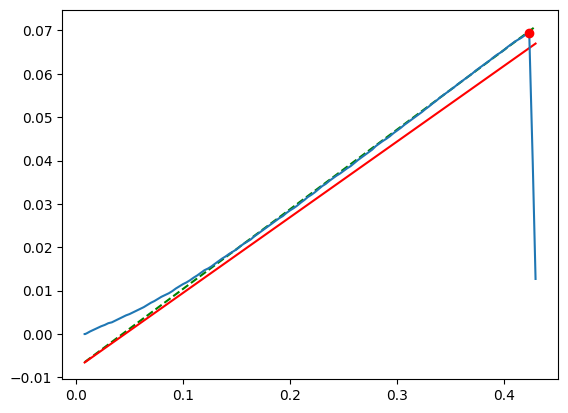

In [95]:
plt.plot(data_select['Force at Break (Standard)'],data_select['Tangent'], 'b--', color='green')
plt.plot(data_select['Force at Break (Standard)'],data_select['Secant'],color ='red')
plt.plot(data_select['Force at Break (Standard)'],data_select['Displacement at Break (Standard)'])

idx = np.argwhere(np.diff(np.sign(data_select['Displacement at Break (Standard)']-data_select['Secant']))).flatten()
plt.plot(data_select['Force at Break (Standard)'][idx], data_select['Displacement at Break (Standard)'][idx], 'ro')
plt.show()

In [98]:
import metpy.calc as mpcalc
%matplotlib inline

In [121]:
x  = data_select['Force at Break (Standard)'].array
y1 = data_select['Displacement at Break (Standard)'].array
y2 = data_select['Secant'].array
y3 = data_select['Tangent'].array

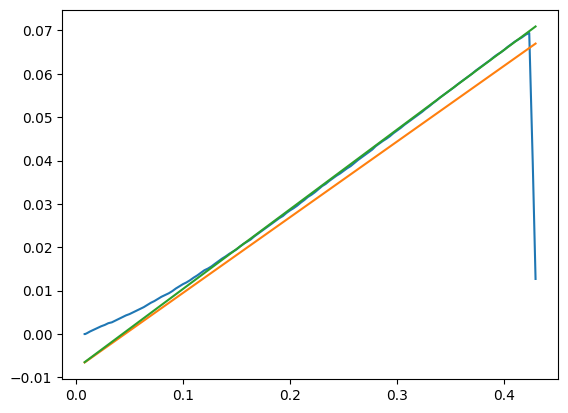

In [122]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

In [123]:
xi_all, yi_all = mpcalc.find_intersections(x,y1,y2)
xi_inc, yi_inc = mpcalc.find_intersections(x,y1,y2, direction = 'increasing')
xi_dec, yi_dec = mpcalc.find_intersections(x,y1,y2, direction = 'decreasing')

### find_intersections mpcalc
metpy.calc.find_intersections(x, a, b, direction='all', log_x=False)
Calculate the best estimate of intersection.

Calculates the best estimates of the intersection of two y-value data sets that share a common x-value set.

Parameters
x (array-like) – 1-dimensional array of numeric x-values

a (array-like) – 1-dimensional array of y-values for line 1

b (array-like) – 1-dimensional array of y-values for line 2

direction (str, optional) – specifies direction of crossing. ‘all’, ‘increasing’ (a becoming greater than b), or ‘decreasing’ (b becoming greater than a). Defaults to ‘all’.

Text(0.5, 1.0, 'Decreasing')

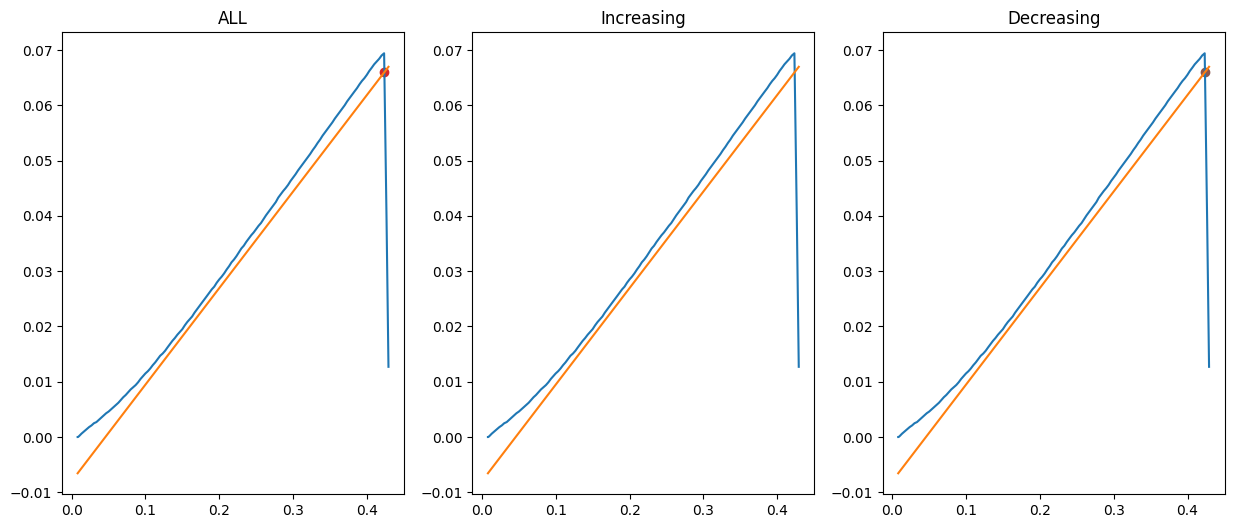

In [124]:
fig, axes = plt.subplots(ncols=3, figsize= (15,6))
for ax in axes:
    ax.plot(x,y1)
    ax.plot(x,y2)
axes[0].scatter(xi_all, yi_all, color='tab:red')
axes[1].scatter(xi_inc, yi_inc, color='tab:green')
axes[2].scatter(xi_dec, yi_dec, color='tab:brown')
axes[0].set_title('ALL')
axes[1].set_title('Increasing')
axes[2].set_title('Decreasing')

In [125]:
xi_dec

Magnitude,"[0.4236740254586057]Length: 1, dtype: float64"
Units,dimensionless


In [126]:
yi_dec

Magnitude,"[0.06598843445332365]Length: 1, dtype: float64"
Units,dimensionless


In [129]:
y1.max()

0.0694

### First validity check Pmax/Pq <1.1

In [179]:
PQ   = float(yi_dec[0])
Pmax = y1.max()
Ratio_PQ_Pmax = Pmax/PQ
Check_value = 1.1

In [181]:
PQ

0.06598843445332365

In [173]:
Pmax

0.0694

In [183]:
R_Pq_Pm=Ratio_PQ_Pmax

In [184]:
if R_Pq_Pm > Check_value:
    print('Test is invalid because Pmax/PQ > 1.1')
else:
    print('Test is valid because Pmax/PQ < 1.1')

Test is valid because Pmax/PQ < 1.1


### Check if Pmax falls between tangent and secant line, if not use PQ to calc KQ

In [185]:
x_Pmax_df = data_select.loc[data_select['Displacement at Break (Standard)']== Pmax, 'Force at Break (Standard)']
# data_select['Force at Break (Standard)']

# data_select.set_index('Displacement at Break (Standard)').loc[x, Pmax]

In [186]:
x_Pmax = float(x_Pmax_df)

C:\Users\AnaLeandro\AppData\Local\Temp\ipykernel_52748\3576775881.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x_Pmax = float(x_Pmax_df)


In [187]:
x_Pmax

0.4233

In [193]:
x_PQ_df = data_select.loc[data_select['Secant']== PQ, 'Force at Break (Standard)']

In [194]:
x_PQ_df

Series([], Name: Force at Break (Standard), dtype: float64)

In [191]:
data_select[data_select['Displacement at Break (Standard)']== PQ]

,Force at Break (Standard),Displacement at Break (Standard),Tangent,Secant,Tangent_2,diff_Sec_Disp


In [195]:
x_PQ = float(xi_dec[0])

In [196]:
x_PQ

0.4236740254586057

In [200]:
xi_all_2, yi_all_2 = mpcalc.find_intersections(x,y1,y3)
xi_inc_2, yi_inc_2 = mpcalc.find_intersections(x,y1,y3, direction = 'increasing')
xi_dec_2, yi_dec_2 = mpcalc.find_intersections(x,y1,y3, direction = 'decreasing')

Text(0.5, 1.0, 'Decreasing')

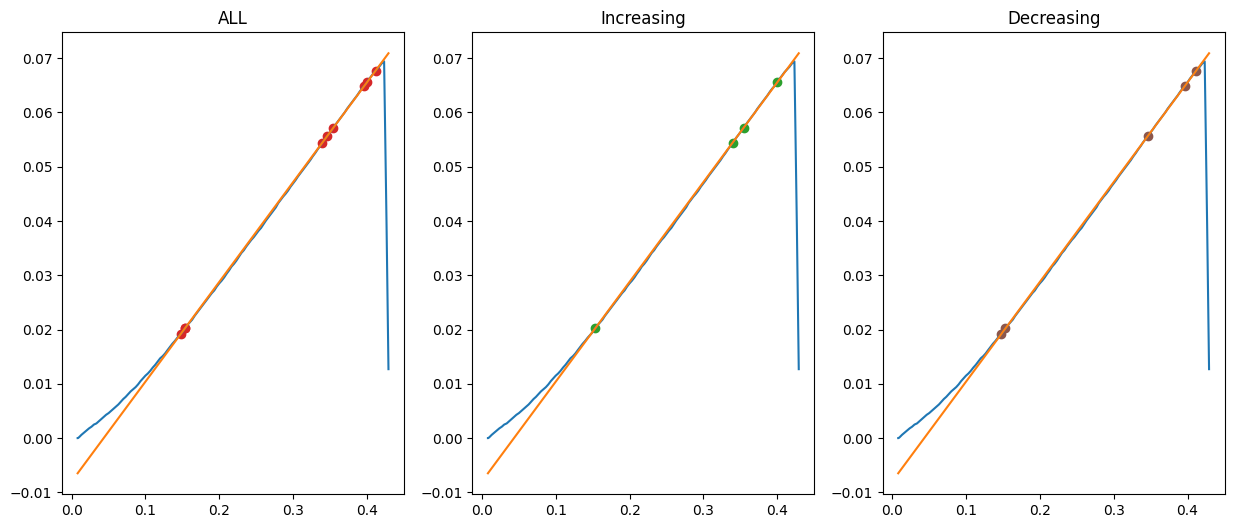

In [201]:
fig, axes = plt.subplots(ncols=3, figsize= (15,6))
for ax in axes:
    ax.plot(x,y1)
    ax.plot(x,y3)
axes[0].scatter(xi_all_2, yi_all_2, color='tab:red')
axes[1].scatter(xi_inc_2, yi_inc_2, color='tab:green')
axes[2].scatter(xi_dec_2, yi_dec_2, color='tab:brown')
axes[0].set_title('ALL')
axes[1].set_title('Increasing')
axes[2].set_title('Decreasing')

In [256]:
from scipy.integrate import simpson

area_Uq = simpson(y=data_select['Displacement at Break (Standard)'], x=data_select['Force at Break (Standard)'])
area_Uq

0.013695523832943209

In [257]:
# Select the portion of the curve up to Pmax or Pq pendending on what you chose
data_select = data[data['Force at Break (Standard)'] <= Pmax]

# Calculate the area up to Pmax
area_Ui = simpson(y=data_select['Displacement at Break (Standard)'], x=data_select['Force at Break (Standard)'])

TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'str'

In [206]:
x_Tan = float(xi_all_2.max())

In [207]:
x_Tan

0.41166484085862354

### If the maximum load that the specimen was able to sustain, Pmax, falls within lines (AB) and (AB'), use Pmax to calculate KQ. 
### If Pmax falls outside line (AB) and line (AB'), then use the intersection of line (AB') and the load curve as PQ

In [209]:
if x_Tan < x_Pmax < x_PQ:
    print('Use Pmax to calculate Kq')
else:
    print('Use PQ to calculate Kq')

Use Pmax to calculate Kq


### Kq calc

In [210]:
PQ

0.06598843445332365

In [248]:
# dimensions-- from ASTM D5045
W = float(0.01);             # height of sample in meters
B = (W/2);            # thickness of part in meters
length = (2*(2.2*W)); # total length of part in meters
a = (W/2);            # crack length 
x = a/W

In [242]:
import math

In [243]:
fx = 6*math.sqrt(x)*(1.99-x*(1-x)*(2.15-3.93*x+2.7*(x**2)))/(1+2*x)*(1-x)**(3/2)

In [244]:
Kq = (Pmax/B*math.sqrt(W))*fx

In [246]:
Kq #1.5087

1.8477750000000002

### GQ calc


In [236]:
A= (16*(x**2)/((1-x)**2))*(8.9- 33.717*x + 79.616*(x**2) - 112.952*(x**3) + 84.815*(x**4) - 25.672*(x**5))


In [237]:
dA_dx =  (16*(x**2)/(1-x)**2)*(-33.717 + 159.232*x -338.856*(x**2) + 339.26*(x**3)-128.36*(x**4)) + (32*x/(1-x)**3*(8.9 - 33.717*x + 79.616*(x*2) -112.952*(x**3) + 84.815*(x**4) - 25.672*(x**5)))

In [238]:
sigma = (A + 18.64)/dA_dx

In [239]:
sigma

0.007095787991684754

In [240]:
A

37.20300000000002

In [235]:
dA_dx

7869.88

In [258]:
U = area_Uq - area_Ui